In [424]:
import torch
from models.vae import VAE
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [425]:
DATA_DIR = 'rollouts'
CHECKPOINTS_DIR = 'vae_checkpoints'
LATENT_DIMS = 32

In [426]:
filelist = os.listdir(DATA_DIR)
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [427]:
obs.shape
frame = random.choice(obs).reshape(1, 96, 96, 3)
frame.shape

(1, 96, 96, 3)

In [428]:
model = VAE(latent_dims=LATENT_DIMS, in_c=3)
model.load_state_dict(torch.load(os.path.join(CHECKPOINTS_DIR, '2.pth'), weights_only=True))
# model.eval()

<All keys matched successfully>

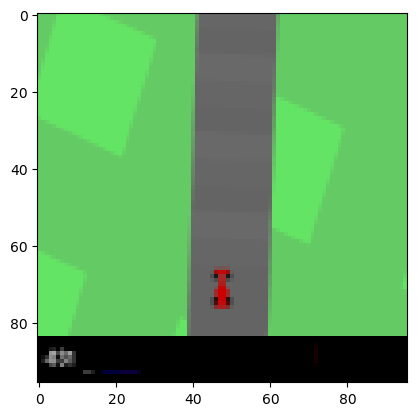

In [429]:
plt.grid(False)
plt.imshow(frame[0])

In [430]:
frame = torch.tensor(frame)
frame = frame.permute(0, 3, 1, 2)
hidden = model.encoder(frame)
print(hidden)
out = model.decoder(hidden)

tensor([[-0.4757,  0.0714, -0.5267, -0.6690, -0.6799, -1.2728,  0.4772,  0.5350,
         -0.0748, -0.9769,  0.2054,  0.1416, -0.2515,  1.6569, -0.6720, -0.8778,
          0.2424,  0.5269, -0.1771,  0.2283, -0.1560,  1.4560,  1.2702,  1.4701,
          0.0029, -2.0418, -0.0705, -0.1567,  0.5500,  0.2354,  0.4863,  0.3705]],
       grad_fn=<AddBackward0>)


(1, 3, 96, 96)
0.93406415
0.93406415
1.9824766e-08
0.44356424


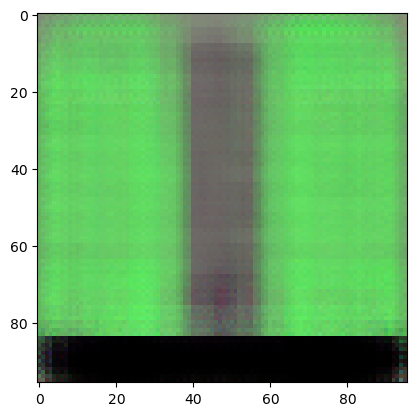

In [431]:
out = out.detach().numpy()
print(out.shape)
print(np.ptp(out))
print(np.max(out))
print(np.min(out))
print(np.mean(out))
plt.imshow(out.transpose(0, 2, 3, 1)[0])

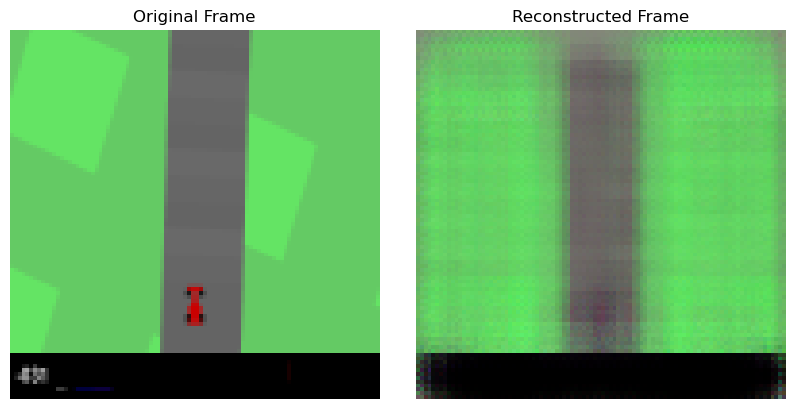

In [432]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Remove spacing between subplots
plt.subplots_adjust(wspace=0.1)

# Plot original frame on the first subplot
ax1.imshow(frame[0].permute(1, 2, 0))
ax1.set_title('Original Frame')
ax1.axis('off')  # Remove grid/axes

# Plot reconstructed frame on the second subplot
ax2.imshow(out.transpose(0, 2, 3, 1)[0])
ax2.set_title('Reconstructed Frame')
ax2.axis('off')  # Remove grid/axes

# Show the plot
plt.show()